In [ ]:
import pandas as pd
import json
import numpy as np

file_path = '/Users/adirazgoldfarb/Yoav Shechner/pm_data/la_pm_2021.json'
import h5py
f = h5py.File(misr_file)

with open(file_path) as f:
    data = (json.load(f))['Data']

In [ ]:
df = pd.DataFrame(data)

In [ ]:
np.min(df['sample_measurement'])

In [ ]:
df.columns


In [ ]:
df['date_local'] # sample data - feb 1 to may 1 2021

In [569]:

import xarray as xr
import rioxarray as rxr

#level 1a  ASDC / Data / MISR / MI1AC.002 / 2021.03.16
#calibration data
calib_file = '/Users/adirazgoldfarb/Yoav Shechner/misr_data/MISR_AM1_FM_CAL_P001_O112994_AF_F01_0008.hdf'
#https://asdc.larc.nasa.gov/data/MISR/MIL1A.002/2022.04.21/
#level 1A
misr_file_bf = '/Users/adirazgoldfarb/Yoav Shechner/misr_data/MISR_AM1_FM_SCI_P008_O118834_BF_F03_0024.hdf'#MISR_AM1_FM_SCI_P008_O118834_AA_F03_0024.hdf'
misr_file_aa = '/Users/adirazgoldfarb/Yoav Shechner/misr_data/MISR_AM1_FM_SCI_P008_O118834_AA_F03_0024.hdf'#MISR_AM1_FM_SCI_P008_O118834_AA_F03_0024.hdf'



#https://asdc.larc.nasa.gov/data/MISR/MI1B2E.003/2021.02.03/
misr_file = '/Users/adirazgoldfarb/Yoav Shechner/misr_data/levelb2/MISR_AM1_GRP_ELLIPSOID_GM_P002_O112397_AA_F03_0024.hdf'

In [591]:
misr = rxr.open_rasterio(misr_file)#,mask_and_scale=True)

misr[2]

<xarray.Dataset>
Dimensions:            (band: 180, x: 512, y: 2048)
Coordinates:
  * band               (band) int64 1 2 3 4 5 6 7 ... 175 176 177 178 179 180
  * x                  (x) float64 7.461e+06 7.461e+06 ... 7.601e+06 7.601e+06
  * y                  (y) float64 1.091e+06 1.09e+06 ... 5.279e+05 5.276e+05
    spatial_ref        int64 0
Data variables:
    Red Radiance_RDQI  (band, y, x) uint16 ...
Attributes: (12/60)
    AGP_version_id:                     2
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MISR
    ASSOCIATEDPLATFORMSHORTNAME.1:      AM-1
    ASSOCIATEDSENSORSHORTNAME.1:        AA
    AUTOMATICQUALITYFLAG.1:             Not Investigated
    AUTOMATICQUALITYFLAGEXPLANATION.1:  Automatic quality determination softw...
    ...                                 ...
    SP_AM_MISR_EndBlock:                172
    SP_AM_MISR_ProductVersion:          24
    SP_AM_MISR_StartBlock:              29
    SP_AM_PATH_NO:                      2
    Start_block:                        29
    VERSIONID:                          3

In [ ]:
# how to read xarray data - attributes are with . ( misr[0].attrs ['name of ..']), Data variables are [''] or bt mise.variables['']
red = misr[2]['Red Radiance_RDQI'].to_numpy()
blue = misr[0]['Blue Radiance_RDQI']
green =  misr[0]['Green Radiance_RDQI'].to_numpy()
nir = misr[0]['NIR Radiance_RDQI'].to_numpy()
solar_zenith = misr[1]['SolarZenith'].to_numpy()
solar_azimuth = misr[1]['SolarAzimuth'].to_numpy()



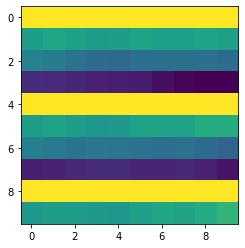

In [532]:
blue_s = np.right_shift(blue[100,:,:],2).astype(np.double)
plt.imshow(blue_s[0:10,0:10])

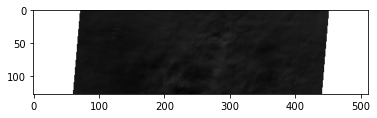

In [531]:

plt.imshow(data,cmap='gray')

In [ ]:

plt.imshow(misr1[0]['DNs'].data[0][0:3000,:],cmap='gray')
misr1[0]['DNs']

In [ ]:
import earthpy as et
et.data.get_data()

In [1]:
"""

This example code illustrates how to access and visualize an LaRC MISR SOM
grid file in Python.

If you have any questions, suggestions, or comments on this example, please use
the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an
example of any other NASA HDF/HDF-EOS data product that is not listed in the
HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to
contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum
(http://hdfeos.org/forums).

Usage:  save this script and run

    python MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.hdf.py

 The file contains SOM projection. We need to use "eos2dump" to generate 1D 
 lat and lon and then convert them to 2D lat and lon accordingly.
 For example, run command as follows to get SOM projectoin lat/lon in ASCII.

 $eos2dump -c1 MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.hdf BlueBand 50 > lat_MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.output
 $eos2dump -c2 MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.hdf BlueBand 50 > lon_MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.output

The HDF file and HDF-EOS2 dumper output files for lat/lon must be in your 
current working directory.

Tested under: Python 2.7.13 :: Anaconda 4.3.22 
Last updated: 2017-12-13
"""

import os
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mpl_toolkits.basemap.pyproj as pyproj
import numpy as np
#from mpl_toolkits.basemap import Basemap
from pyhdf.SD import *

# Set file name to read.
FILE_NAME = '/Users/adirazgoldfarb/Yoav Shechner/misr_data/levelb2/MISR_AM1_GRP_ELLIPSOID_GM_P002_O112397_AA_F03_0024.hdf'

# Set dataset name to read.
DATAFIELD_NAME = 'Blue Radiance/RDQI'

# Open file.
hdf = SD(FILE_NAME, SDC.READ)

# Read dataset.
data3D = hdf.select(DATAFIELD_NAME)

# We pick the 50th SOM block.
data = data3D[99,:,:]

# Read attributes.
attrs = data3D.attributes(full=1)
fva=attrs["_FillValue"]
_FillValue = fva[0]

# Read scale factor using HDFView.
# It is under /BlueBand/Grid Attributes/Scale factor.
scale_factor = 0.047203224152326584


# We need to shift bits for "RDQI" to get "Blue Band "only. 
# See the page 84 of "MISR Data Products Specifications (rev. S)".
# The document is available at [1].
datas = np.right_shift(data, 2);
dataf = datas.astype(np.double)

# Apply the fill value.
dataf[data == _FillValue] = np.nan

# Filter out values (> 16376) used for "Flag Data".
# See Table 1.2 in "MISR Level 1 Radiance Scaling and Conditioning
# Algorithm  Theoretical Basis" document [2].
dataf[datas > 16376] = np.nan
datam = np.ma.masked_array(dataf, mask=np.isnan(dataf))

# Apply scale facotr.
#datam = scale_factor * datam;



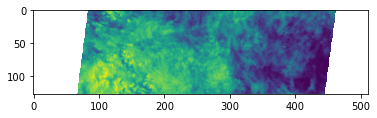

In [3]:
plt.imshow(datam)
#pandas.hdf

In [6]:
hdf.select('')

HDF4Error: select: non-existent dataset

In [604]:

# Read geolocation dataset from HDF-EOS2 dumper output.
GEO_FILE_NAME = 'lat_MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.output'
lat = np.genfromtxt(GEO_FILE_NAME, delimiter=',', usecols=[0])
lat = lat.reshape(data.shape)
    
GEO_FILE_NAME = 'lon_MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.output'
lon = np.genfromtxt(GEO_FILE_NAME, delimiter=',', usecols=[0])
lon = lon.reshape(data.shape)


# Set the limit for the plot.
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=np.min(lat), urcrnrlat = np.max(lat),
            llcrnrlon=np.min(lon), urcrnrlon = np.max(lon))
m.drawcoastlines(linewidth=0.5)
lat_sp = (np.max(lat)-np.min(lat)) / 4.0
m.drawparallels(np.arange(np.min(lat), np.max(lat), lat_sp), 
                labels=[1, 0, 0, 0])
lon_sp = (np.max(lon)-np.min(lon)) / 4.0
m.drawmeridians(np.arange(np.min(lon), np.max(lon), lon_sp), 
                labels=[0, 0, 0, 1])
m.pcolormesh(lon, lat, datam, latlon=True)
cb = m.colorbar()
pm = m.scatter(lon, lat, c=datam, s=1.0,  cmap=plt.cm.jet,
               edgecolors=None, linewidth=0)        
cb.set_label(r'$Wm^{-2}sr^{-1}{\mu}m^{-1}$')

basename = os.path.basename(FILE_NAME)
plt.title('{0}\n{1}'.format(basename, 'Blue Radiance'))
fig = plt.gcf()
a = fig.gca()
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

# References
# 
# [1] https://asdc.larc.nasa.gov/documents/misr/DPS_v50_RevS.pdf
# [2] https://eospso.gsfc.nasa.gov/sites/default/files/atbd/atbd-misr-01.pdf

    


FileNotFoundError: lat_MISR_AM1_GRP_ELLIPSOID_GM_P019_O067531_AN_F03_0024.output not found.